# Anomaly Detection Demo: Web Traffic Spikes

- This notebook demonstrates anomaly detection techniques using statistical analysis and machine learning algorithms.
- Two synthetic datasets, representing website clicks and visits, are used to illustrate these methods.
- Refer to the [document here](./30-anomaly_detection_intro.md) for a theoretical background.


# Dataset 1 - Visually Obvious Anomalies


## Generate Dataset 1

- This section creates a dataset with large, easily noticeable anomalies.
- It sets a baseline of random traffic and introduces significant spikes at specific times.


In [1]:
# Dataset 1 - Visually Obvious Anomalies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Part 1 - Dataset Generation for Visually Obvious Anomalies
# --------------------------------------------------------
# This section focuses on creating a dataset where the anomalies are large and easily visible
# without the need for complex statistical analysis. The goal is to demonstrate scenarios
# where simple visual inspection can be sufficient for anomaly detection.

# Set a random seed for reproducibility.
# This ensures that the random numbers generated are the same every time you run the code,
# making the results consistent.
np.random.seed(42)

# Create a time series index using pandas' date_range.
# This generates a sequence of hourly timestamps starting from '2023-10-26', for 100 periods.
# 'freq='h'' specifies that the interval between each timestamp is one hour.
time = pd.date_range(start='2023-10-26', periods=100, freq='h')

# Generate baseline web traffic data using random integers.
# np.random.randint(low, high, size) generates random integers between 'low' (inclusive)
# and 'high' (exclusive). 'size=100' creates an array of 100 random integers.
# This simulates normal fluctuations in page views.
baseline_traffic = np.random.randint(50, 100, size=100)

# Introduce very obvious spikes in page views to simulate significant anomalies.
# These spikes are designed to be easily noticeable in a plot of the data.

# Set a very high page view count at index 50.
# This simulates a sudden, significant surge in traffic at a specific hour.
baseline_traffic[50] = 350

# Set an even higher page view count at the next hour (index 51).
# This reinforces the anomaly and shows a sustained high traffic period.
baseline_traffic[51] = 400

# Set a slightly lower but still very high page view count at the following hour (index 52).
# This shows the spike gradually returning towards normal levels.
baseline_traffic[52] = 380

# Create a Pandas DataFrame to store the timestamp and page view data.
# A DataFrame is a tabular data structure that is ideal for organizing and manipulating data.
df1 = pd.DataFrame({'Timestamp': time, 'PageViews': baseline_traffic})

print("Dataset with visually obvious anomalies generated successfully.")
print(df1.head())

Dataset with visually obvious anomalies generated successfully.
            Timestamp  PageViews
0 2023-10-26 00:00:00         88
1 2023-10-26 01:00:00         78
2 2023-10-26 02:00:00         64
3 2023-10-26 03:00:00         92
4 2023-10-26 04:00:00         57


## Plot Dataset 1

- This section plots the 'PageViews' data as a line graph, showing a clear spike.
- The large anomaly illustrates scenarios where visual inspection is sufficient.
- The suitability of an anomaly detection method is tied to anomaly magnitude.


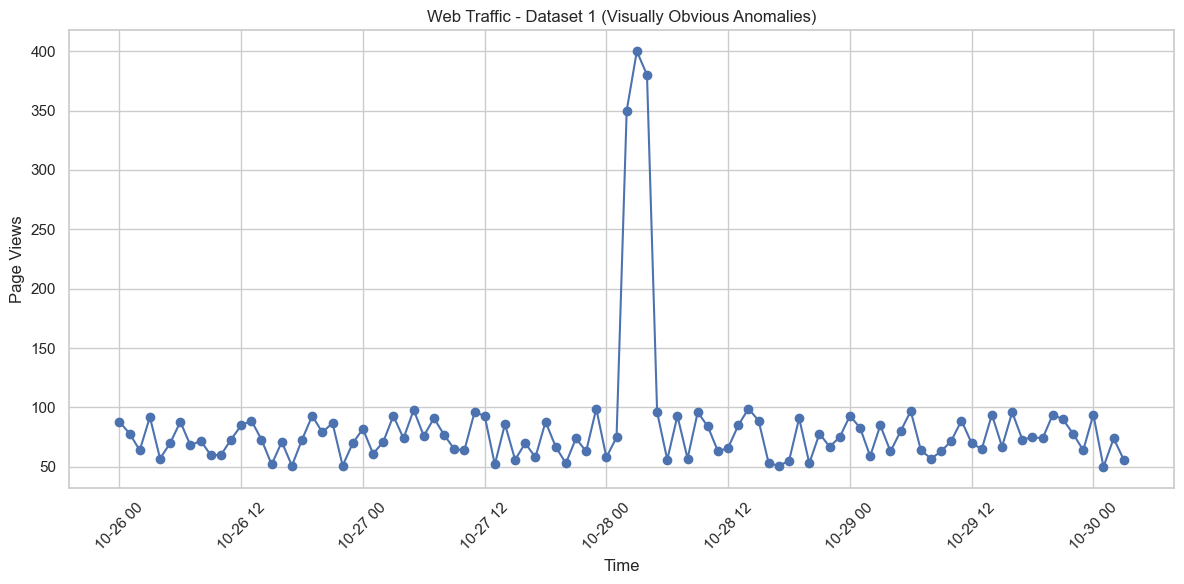

Simple plot of Dataset 1 generated. The large spikes are immediately noticeable.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Part 2 - Simple Plot of Dataset 1: Demonstrating Obvious Anomalies
# -------------------------------------------------------------
# This section generates a basic line plot of the 'PageViews' data from the first dataset.
# The primary objective is to visually showcase the large anomalies that are immediately apparent
# without the need for any statistical methods or complex analysis.

# Assuming the 'df1' DataFrame was created in the previous cell (Part 1).
# This check ensures that the necessary data exists before attempting to plot it.
if 'df1' not in locals():
    raise Exception("Please run Part 1 of this section first to create the 'df1' DataFrame.")

# Create a new figure and a set of subplots.
# figsize=(width, height) sets the size of the plot in inches, making it more readable.
plt.figure(figsize=(12, 6))

# Plot the 'PageViews' data against the 'Timestamp'.
# 'marker='o'' adds circular markers at each data point.
# 'linestyle='-'' connects the data points with a solid line.
plt.plot(df1['Timestamp'], df1['PageViews'], marker='o', linestyle='-')

# Set the title of the plot.
# This clearly indicates that the plot is showing web traffic with visually obvious anomalies.
plt.title('Web Traffic - Dataset 1 (Visually Obvious Anomalies)')

# Label the x-axis.
plt.xlabel('Time')

# Label the y-axis.
plt.ylabel('Page Views')

# Rotate the x-axis labels for better readability, especially when there are many timestamps.
# 'rotation=45' rotates the labels by 45 degrees.
plt.xticks(rotation=45)

# Adjust the plot layout to provide sufficient spacing around the plot elements, preventing labels from overlapping.
plt.tight_layout()

# Display the plot.
plt.show()

print("Simple plot of Dataset 1 generated. The large spikes are immediately noticeable.")

# Dataset 2 - Anomalies Not Immediately Visible

- This section introduces a dataset with more subtle, less visible anomalies.


## Generate Dataset 2

- This section generates a time series with small anomalies.
- It uses a random seed, hourly timestamps, baseline traffic and then introduces anomalies.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1 - Dataset Generation
# --------------------------
# This section focuses on creating a synthetic time series dataset simulating hourly website clicks.
# It introduces some subtle anomalies to demonstrate how they might appear in real-world data.

# Set a random seed for reproducibility.
# This ensures that every time you run this cell, the random numbers generated are the same.
# This is crucial for making your results consistent and comparable.
np.random.seed(742)

# Define the number of hours to simulate.
# We are simulating 3 days of data, with 24 hours in each day.
num_hours = 24 * 3

# Create a time series index using pandas' date_range function.
# This generates a sequence of hourly timestamps, starting from '2023-10-27'.
# 'freq='h'' specifies that the intervals between timestamps are one hour.
time_index = pd.date_range(start='2023-10-27', periods=num_hours, freq='h')

# Define the baseline number of clicks per hour.
# This represents the typical, expected level of website traffic.
baseline_clicks = 100

# Simulate normal, random variation in website clicks using a normal distribution.
# np.random.normal(mean, standard_deviation, number_of_samples)
# Here, the mean is 0 (representing fluctuations around the baseline), and the standard deviation is 5.
# This simulates the usual ups and downs in traffic.
normal_variation = np.random.normal(0, 5, num_hours)

# Create the base click data by adding the normal variation to the baseline clicks.
# This forms the initial time series data with typical fluctuations.
clicks = baseline_clicks + normal_variation

# Introduce slightly larger, subtle anomalies into the click data to simulate unusual events.
# These anomalies are designed to be noticeable but not overly obvious.

# Add a small positive spike at the 11th hour (index 10).
# This could represent a brief surge in interest or activity.
clicks[10] += 6

# Introduce a small negative dip at the 36th hour (index 35).
# This might indicate a temporary outage or problem.
clicks[35] -= 5

# Simulate a sustained period of slightly higher clicks from the 51st to the 55th hour (inclusive).
# This could represent a campaign or event that increases traffic for a short duration.
clicks[50:55] += 4

# Create a Pandas DataFrame to store the timestamp and click data.
# A DataFrame is a table-like structure that is ideal for working with time series data.
data = pd.DataFrame({'Timestamp': time_index, 'Clicks': clicks})

# Set the 'Timestamp' column as the index of the DataFrame.
# Setting the timestamp as the index is essential for time series analysis and plotting.
# 'inplace=True' modifies the DataFrame directly.
data.set_index('Timestamp', inplace=True)

print("Dataset generated successfully.")
print(data.head())

Dataset generated successfully.
                         Clicks
Timestamp                      
2023-10-27 00:00:00   90.754538
2023-10-27 01:00:00   97.607429
2023-10-27 02:00:00  104.071973
2023-10-27 03:00:00  103.846046
2023-10-27 04:00:00   93.134076


## Plot Dataset 2

- This section shows a line plot of the 'Clicks' data.
- The plot shows subtle deviations, highlighting the difficulty of anomaly detection through visual inspection alone.


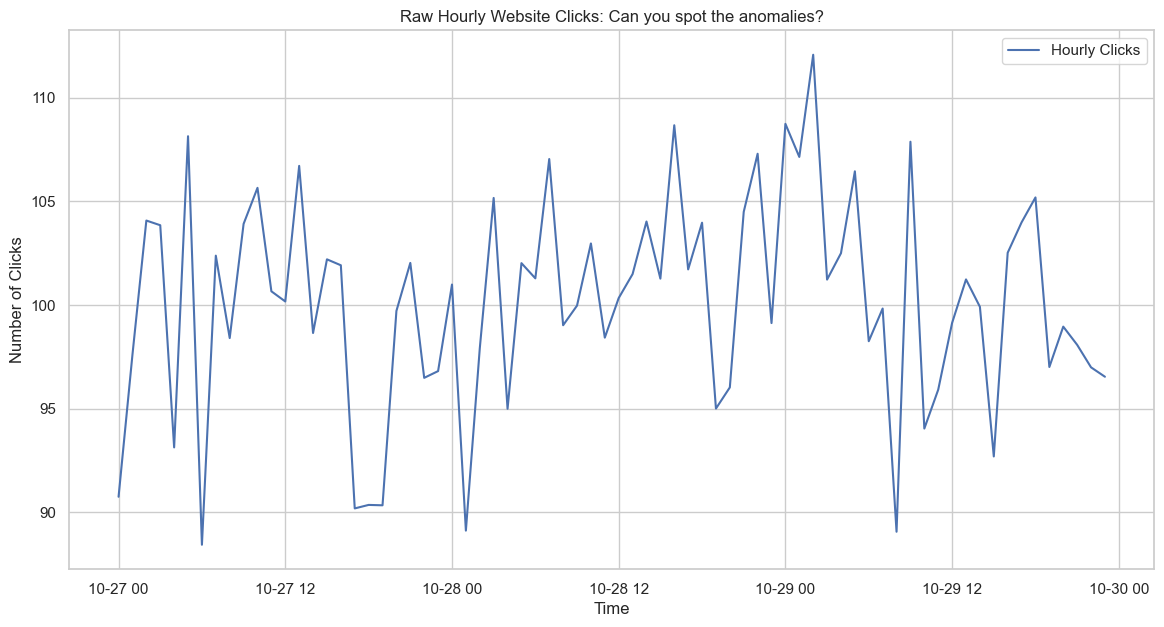

Simple plot of raw data generated. Notice how difficult it is to definitively identify anomalies just by looking at this plot.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 2 - Simple Plot of Raw Data: Highlighting the Difficulty of Anomaly Detection
# -------------------------------------------------------------------------------
# This section creates a basic line plot of the raw 'Clicks' data over time.
# The main objective is to visually demonstrate how challenging it can be to identify anomalies
# simply by inspecting the raw data without any further analysis or techniques.

# Assuming the 'data' DataFrame was created in the previous cell (Part 1).
# This check ensures that the necessary data exists before attempting to plot it.
if 'data' not in locals():
    raise Exception("Please run Part 1 - Dataset Generation first to create the 'data' DataFrame.")

# Create a new figure and a set of subplots.
# figsize=(width, height) sets the size of the plot in inches, making it more readable.
plt.figure(figsize=(14, 7))

# Plot the hourly click data as a solid blue line.
# 'data.index' provides the timestamps for the x-axis, and 'data['Clicks']' provides the click counts for the y-axis.
# 'label='Hourly Clicks'' adds a label to the line, which will be shown in the legend.
plt.plot(data.index, data['Clicks'], label='Hourly Clicks')

# Set the title of the plot.
# This clearly describes what the plot is showing.
plt.title('Raw Hourly Website Clicks: Can you spot the anomalies?')

# Label the x-axis.
plt.xlabel('Time')

# Label the y-axis.
plt.ylabel('Number of Clicks')

# Display the legend.
# The legend helps in identifying the different lines and markers in the plot.
plt.legend()

# Add a grid to the plot for better readability.
# The grid makes it easier to see the exact values on the axes.
plt.grid(True)

# Show the plot.
# This command displays the generated plot.
plt.show()

print("Simple plot of raw data generated. Notice how difficult it is to definitively identify anomalies just by looking at this plot.")

## Statistical Methods

- This section uses statistical techniques such as moving average and standard deviation to detect anomalies.
- It shows how these measures provide a \"normal range\" and detects any point that deviates from it.


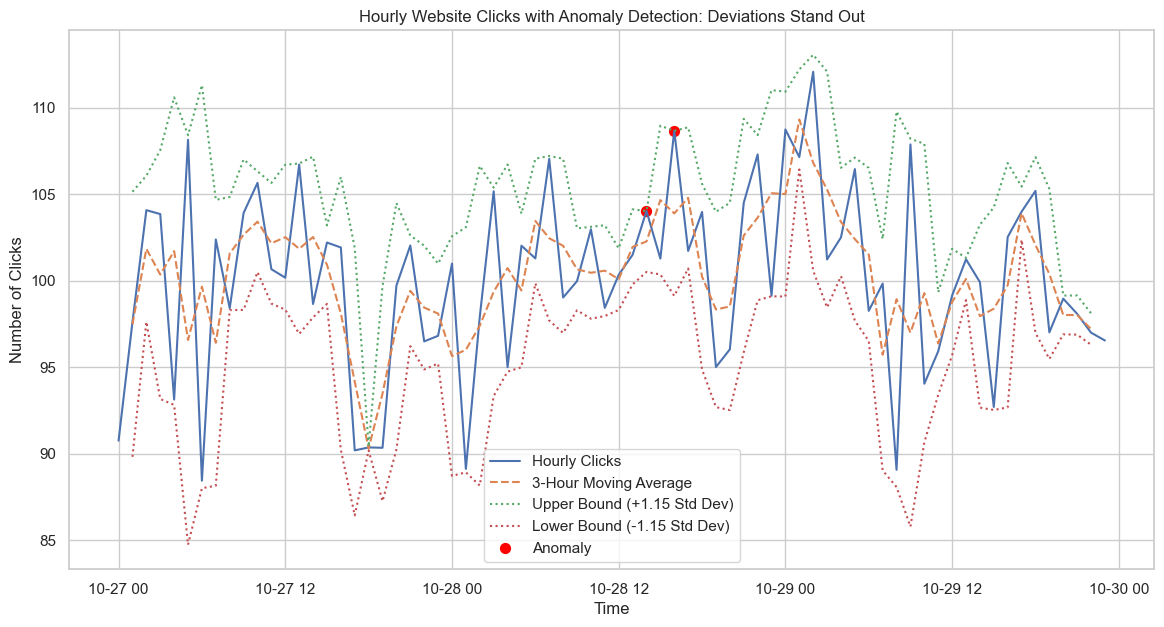

Plot with deviation, averages, and anomaly detection generated. The anomalies are now clearly visible.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 3 - Plot with Deviation, Averages, and Anomaly Detection:  Making Anomalies Visible
# -----------------------------------------------------------------------------------------
# This section builds upon the raw data by calculating moving averages and standard deviations.
# It then uses these calculations to define upper and lower bounds for anomaly detection.
# The plot generated here visually demonstrates how these techniques can help in identifying deviations
# from the expected behavior and highlighting potential anomalies.

# Assuming the 'data' DataFrame was created in Part 1.
if 'data' not in locals():
    raise Exception("Please run Part 1 - Dataset Generation first to create the 'data' DataFrame.")

# Calculate the 3-hour moving average of the 'Clicks' data.
# The rolling function creates a rolling window of a specified size (window=3).
# 'center=True' means the average is calculated around the current time point (including the hour before and after).
# This smooths out short-term fluctuations and highlights longer-term trends.
data['Moving Average'] = data['Clicks'].rolling(window=3, center=True).mean()

# Calculate the standard deviation of the 'Clicks' within the same 3-hour rolling window.
# The standard deviation measures the amount of variation or dispersion in the clicks around the moving average.
# A higher standard deviation indicates more variability.
data['Std Dev'] = data['Clicks'].rolling(window=3, center=True).std()

# Define the upper and lower bounds for anomaly detection.
# These bounds are calculated as a certain number of standard deviations away from the moving average.
# Here, we're using 1.15 times the standard deviation. This factor can be adjusted based on the desired sensitivity.
# A larger factor will result in fewer detected anomalies, and a smaller factor will result in more.
data['Upper Bound'] = data['Moving Average'] + 1.15 * data['Std Dev']
data['Lower Bound'] = data['Moving Average'] - 1.15 * data['Std Dev']

# Identify anomalies by checking if the 'Clicks' value falls outside the defined upper and lower bounds.
# If 'Clicks' is greater than the 'Upper Bound' OR less than the 'Lower Bound', it's considered an anomaly.
# This creates a boolean column where 'True' indicates an anomaly.
data['Anomaly'] = (data['Clicks'] > data['Upper Bound']) | (data['Clicks'] < data['Lower Bound'])

# Plot the data with anomaly detection.
plt.figure(figsize=(14, 7))  # Set the size of the plot.

# Plot the hourly click data as a solid blue line.
plt.plot(data.index, data['Clicks'], label='Hourly Clicks')

# Plot the 3-hour moving average as a dashed orange line.
# The moving average helps to visualize the underlying trend in the data.
plt.plot(data.index, data['Moving Average'], label='3-Hour Moving Average', linestyle='--')

# Plot the upper bound for anomaly detection as a dotted green line.
# This line represents the threshold above which data points are considered unusually high.
plt.plot(data.index, data['Upper Bound'], label=f'Upper Bound (+1.15 Std Dev)', linestyle=':')

# Plot the lower bound for anomaly detection as a dotted red line.
# This line represents the threshold below which data points are considered unusually low.
plt.plot(data.index, data['Lower Bound'], label=f'Lower Bound (-1.15 Std Dev)', linestyle=':')

# Highlight the detected anomalies with red circles.
# We filter the DataFrame to select only the rows where 'Anomaly' is True.
# The scatter plot places red circles at the timestamps where anomalies were detected.
plt.scatter(data[data['Anomaly']].index, data[data['Anomaly']]['Clicks'], color='red', label='Anomaly', s=50) # Added s=50 for better visibility

# Set the title of the plot.
plt.title('Hourly Website Clicks with Anomaly Detection: Deviations Stand Out')

# Label the x-axis.
plt.xlabel('Time')

# Label the y-axis.
plt.ylabel('Number of Clicks')

# Display the legend to identify the different lines and markers.
plt.legend()

# Add a grid to the plot for better readability.
plt.grid(True)

# Show the plot.
plt.show()

print("Plot with deviation, averages, and anomaly detection generated. The anomalies are now clearly visible.")

### Explanation for Standard Deviation Graph

- This graph visualizes website traffic data and highlights anomalies using statistical analysis.

1.  **Graph Components:**

    - **Hourly Clicks (Blue Line):** Represents the raw page view counts per hour.
    - **3-Hour Moving Average (Orange Dashed Line):** The average page view count over a 3-hour rolling window, smoothing out short-term fluctuations.
    - **Upper and Lower Bounds (+/- 1.15 Std Dev) (Green and Red Dotted Lines):** Calculated using standard deviation from the moving average; these lines represent the expected range of variation in the data.
    - **Anomaly (Red Dots):** Points where the 'Hourly Clicks' line exceeds the upper or lower bounds, indicating a significant deviation from the norm.

2.  **3-Hour Rolling Average:**

    - **Trend Identification**: Smoothes short-term fluctuations, making it easier to see long-term trends in the data.
    - **Noise Reduction**: Filters random variations, clarifying the underlying patterns in the traffic.
    - **"Normal" Definition**: Provides a stable baseline against which to assess deviations.

3.  **Standard Deviation Bounds:**

    - **Variation Measure:** Standard deviation quantifies how much data points typically vary from the average.
    - **Threshold Setting:** The upper and lower bounds are defined based on a multiple of the standard deviation, allowing adjustment of anomaly detection sensitivity.

4.  **Purpose:**
    - **Early Problem Detection:** Sudden drops (below lower bound) could indicate website issues.
    - **Success Assessment:** Spikes (above upper bound) might suggest a successful campaign.
    - **Security Threat Identification:** Unusual traffic patterns can reveal malicious activity.
    - **Data-Driven Analysis:** Provides quantifiable insight for decision-making.

This graph visualizes unusual traffic deviations from the baseline, facilitating early problem detection and better decision-making.


## Machine Learning Method

- This section uses the Isolation Forest algorithm to detect anomalies.
- This technique is useful when anomalies do not fit a specific pattern but are outliers from learned data structure.


### Explanation of the AI/ML Code below

1.  **Import `IsolationForest`**: Imports the Isolation Forest model from `sklearn.ensemble`.
2.  **Prepare Data**: Selects the 'Clicks' column from the DataFrame, creating a data array `X` for training.
3.  **Initialize and Train Model:**
    - `n_estimators=100`: Number of trees in the forest. Higher numbers increase accuracy but also computational cost.
    - `contamination=0.05`: Assumes 5% of data points are anomalies; adjust based on data expectations.
    - `random_state=42`: Ensures reproducible results.
    - `model.fit(X)`: Trains the model on click data.
4.  **Predict Anomaly Scores:**
    - `model.decision_function(X)`: Calculates anomaly scores; negative indicates a higher likelihood of being an anomaly.
5.  **Predict Anomalies:**
    - `model.predict(X)`: Classifies each data point as either -1 (anomaly) or 1 (normal data).
6.  **Convert to Boolean**: Creates a boolean `Anomaly_IF_Boolean` column which is `True` for anomalies and `False` for normal datapoints for easier plotting.


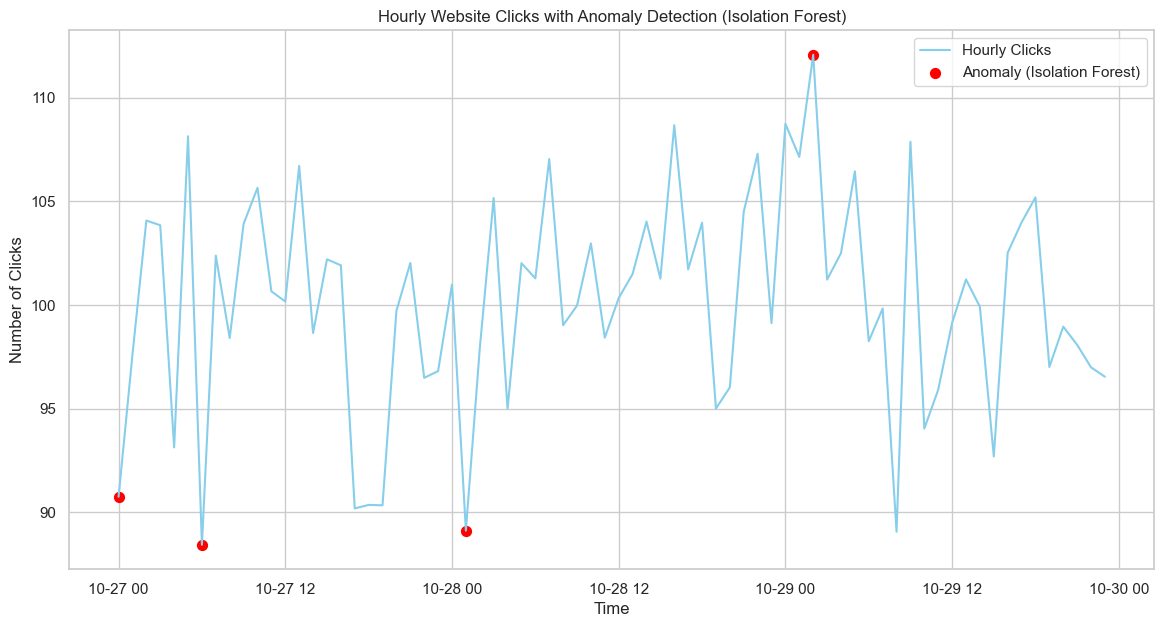

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# This code will train an Isolation Forest model on our website click data and then visualize
# the data points that the model identifies as anomalies.

# Use the same dataset created in the first part
np.random.seed(742)
num_hours = 24 * 3
time_index = pd.date_range(start='2023-10-27', periods=num_hours, freq='h')
baseline_clicks = 100
normal_variation = np.random.normal(0, 5, num_hours)
clicks = baseline_clicks + normal_variation
clicks[10] += 6
clicks[35] -= 5
clicks[50:55] += 4
data = pd.DataFrame({'Timestamp': time_index, 'Clicks': clicks})
data.set_index('Timestamp', inplace=True)

# 1. Prepare the Data for Isolation Forest
X = data[['Clicks']]

# 2. Initialize and Train the Isolation Forest Model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X)

# 3. Predict Anomalies
data['Anomaly_IF'] = model.predict(X)
data['Anomaly_IF_Boolean'] = data['Anomaly_IF'] == -1

# 4. Plot the Data with Isolation Forest Anomaly Detection
plt.figure(figsize=(14, 7))

# Plot the hourly click data
plt.plot(data.index, data['Clicks'], label='Hourly Clicks', color='skyblue')

# Highlight the anomalies detected by Isolation Forest with red markers
plt.scatter(data[data['Anomaly_IF_Boolean']].index, data[data['Anomaly_IF_Boolean']]['Clicks'], color='red', marker='o', s=50, label='Anomaly (Isolation Forest)')

plt.title('Hourly Website Clicks with Anomaly Detection (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('Number of Clicks')
plt.legend()
plt.grid(True)
plt.show()

### Explanation of the AI/ML method graph

- **Graph above**
  - This graph visualizes anomaly detection using the Isolation Forest algorithm.
  - It highlights how AI/ML can identify unusual patterns without predefined thresholds.
- **Graph Components:**
  - `Hourly Clicks (Light Blue Line):` Represents the raw website click counts per hour.
  - `Anomaly (Isolation Forest) (Red Circles):` Data points flagged as anomalies by the Isolation Forest algorithm, indicating deviations from learned patterns.
- **Isolation Forest Algorithm:**
  - `Random Partitioning:` Partitions data randomly, isolating anomalies more quickly than normal data.
  - `Anomaly Scoring:` Calculates an anomaly score based on how easily a point is isolated. Higher negative score indicates higher likelihood of anomaly.
- **Key Observations:**
  - `Outlier Focus:` Isolation Forest highlights data points that are substantially different or far from the general traffic pattern.
  - `Comparison to Statistical Method:` Isolation Forest detects structural anomalies, whereas the previous statistical method detected deviations based on range thresholds.
- **Method Differences:**
  - `Statistical methods:` Identify anomalies by determining data points that fall outside expected boundaries based on central tendencies and variance over a moving window.
  - `Isolation Forest:` Determines anomalies based on data points that have different data structures and are easy to isolate.
- **Purpose:**
  - `Detects structural patterns`: highlights data points that are significantly different from the learned data distribution.
  - `Alternative Perspective`: Offers a different approach to identifying anomalies that may not be detected by statistical methods.
- **Complementary**
  - AI/ML method identifies data points that are structurally dissimilar and easy to isolate, offering a complementary approach to statistical methods for anomaly detection.
